In [1]:
import os
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# from verstack import NaNImputer
# from functools import partial

# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import FunctionTransformer

# from sklearn.model_selection import train_test_split

In [2]:
# Directory config to project root to insure consistency across environments for project specific imports
from pyprojroot import here
os.chdir(here())

# Project specific imports
from src.utils import save_dataframe


In [3]:
# Load dataset
data = pd.read_csv("./data/1.1_imputed_data_full.csv")

In [4]:
data.head()
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9957 entries, 0 to 9956
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   metascore                       9957 non-null   float64
 1   rotten_tomatoes_rating          9957 non-null   float64
 2   meta_critic_rating              9957 non-null   float64
 3   budget                          9957 non-null   float64
 4   revenue                         9957 non-null   float64
 5   metascore_missing               9957 non-null   int64  
 6   rotten_tomatoes_rating_missing  9957 non-null   int64  
 7   meta_critic_rating_missing      9957 non-null   int64  
 8   budget_missing                  9957 non-null   int64  
 9   revenue_missing                 9957 non-null   int64  
 10  total_wins                      9957 non-null   int64  
 11  total_noms                      9957 non-null   int64  
 12  oscar_wins                      99

,metascore,rotten_tomatoes_rating,meta_critic_rating,budget,revenue,metascore_missing,rotten_tomatoes_rating_missing,meta_critic_rating_missing,budget_missing,revenue_missing,...,release_day,is_weekend,is_holiday_season,movie_age,imdb_rating,imdb_votes,tmdb_vote_count,tmdb_vote_average,runtime_in_min,tmdb_popularity
count,9957.000000,9957.000000,9957.000000,9.957000e+03,9.957000e+03,9957.000000,9957.000000,9957.000000,9957.000000,9957.000000,...,9957.000000,9957.000000,9957.000000,9957.000000,9957.000000,9.957000e+03,9957.000000,9957.000000,9957.000000,9957.000000
mean,47.145935,60.686488,47.174390,2.723656e+07,7.229928e+07,0.226474,0.132269,0.226474,0.312946,0.258512,...,15.662248,0.467209,0.343879,19.395802,6.500915,9.881097e+04,1982.208195,6.625751,105.765392,23.511387
std,25.070674,26.666464,25.031255,3.803382e+07,1.580880e+08,0.418570,0.338800,0.418570,0.463716,0.437839,...,8.534648,0.498949,0.475025,15.157295,0.985610,1.838627e+05,3162.951266,0.781258,22.487888,59.069841
min,1.000000,0.000000,1.000000,1.000000e+00,-4.109502e+07,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.600000,5.000000e+00,300.000000,2.200000,2.000000,0.017000
25%,24.000000,40.000000,24.000000,7.145614e+06,6.400000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.000000,0.000000,0.000000,8.000000,5.900000,1.766600e+04,464.000000,6.100000,93.000000,10.609000
50%,50.000000,64.757685,50.000000,1.356348e+07,1.820000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,...,16.000000,0.000000,0.000000,15.000000,6.600000,3.842700e+04,839.000000,6.652000,103.000000,14.987000
75%,67.000000,84.000000,67.000000,3.000000e+07,6.697823e+07,0.000000,0.000000,0.000000,1.000000,1.000000,...,23.000000,1.000000,1.000000,26.000000,7.200000,9.933100e+04,1951.000000,7.200000,117.000000,23.400000
max,100.000000,100.000000,100.000000,4.600000e+08,2.923706e+09,1.000000,1.000000,1.000000,1.000000,1.000000,...,31.000000,1.000000,1.000000,75.000000,9.300000,2.995055e+06,37048.000000,8.800000,367.000000,2889.208000


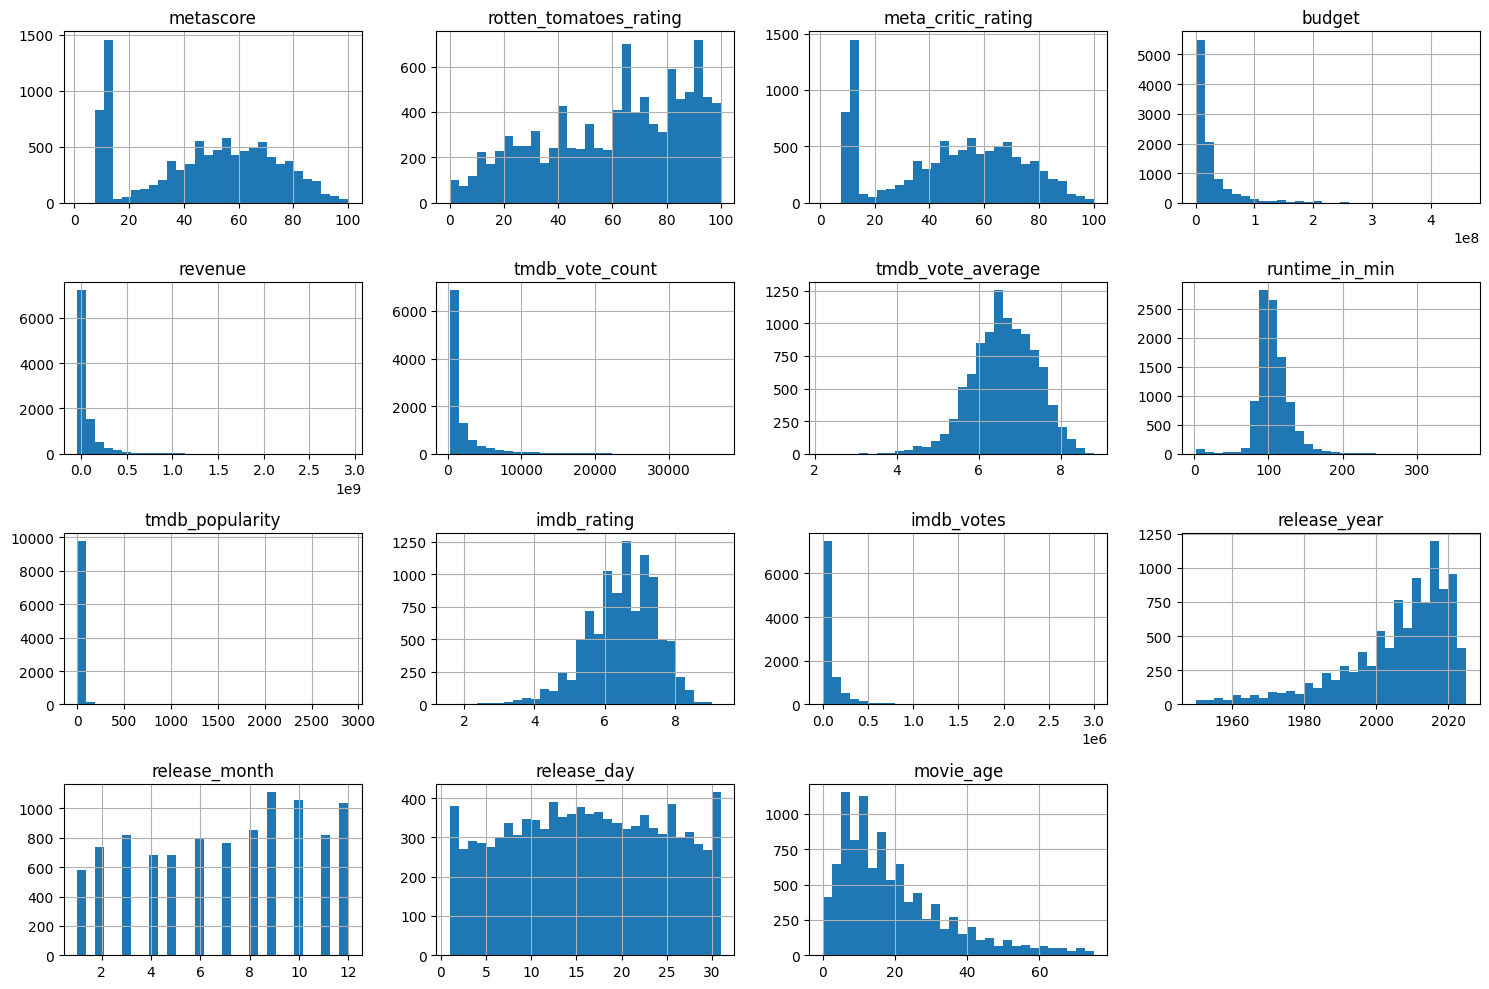

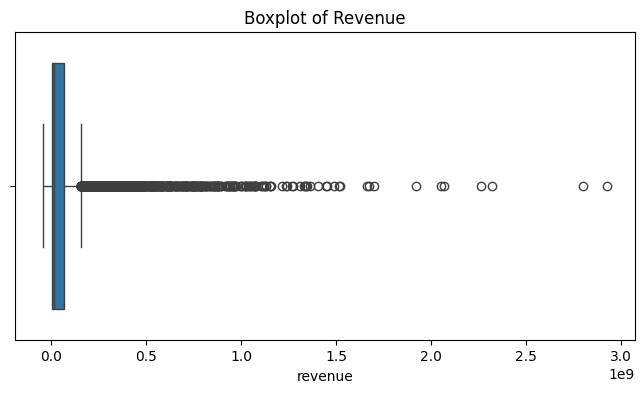

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['metascore', 'rotten_tomatoes_rating', 'meta_critic_rating', 'budget', 'revenue',
                'tmdb_vote_count', 'tmdb_vote_average', 'runtime_in_min', 'tmdb_popularity', 
                'imdb_rating', 'imdb_votes', 'release_year', 'release_month', 'release_day', 'movie_age']

# numeric_cols = data.select_dtypes(include=['number']).columns.tolist()

data[numeric_cols].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Boxplot for revenue as an example
plt.figure(figsize=(8, 4))
sns.boxplot(x=data['revenue'])
plt.title("Boxplot of Revenue")
plt.show()


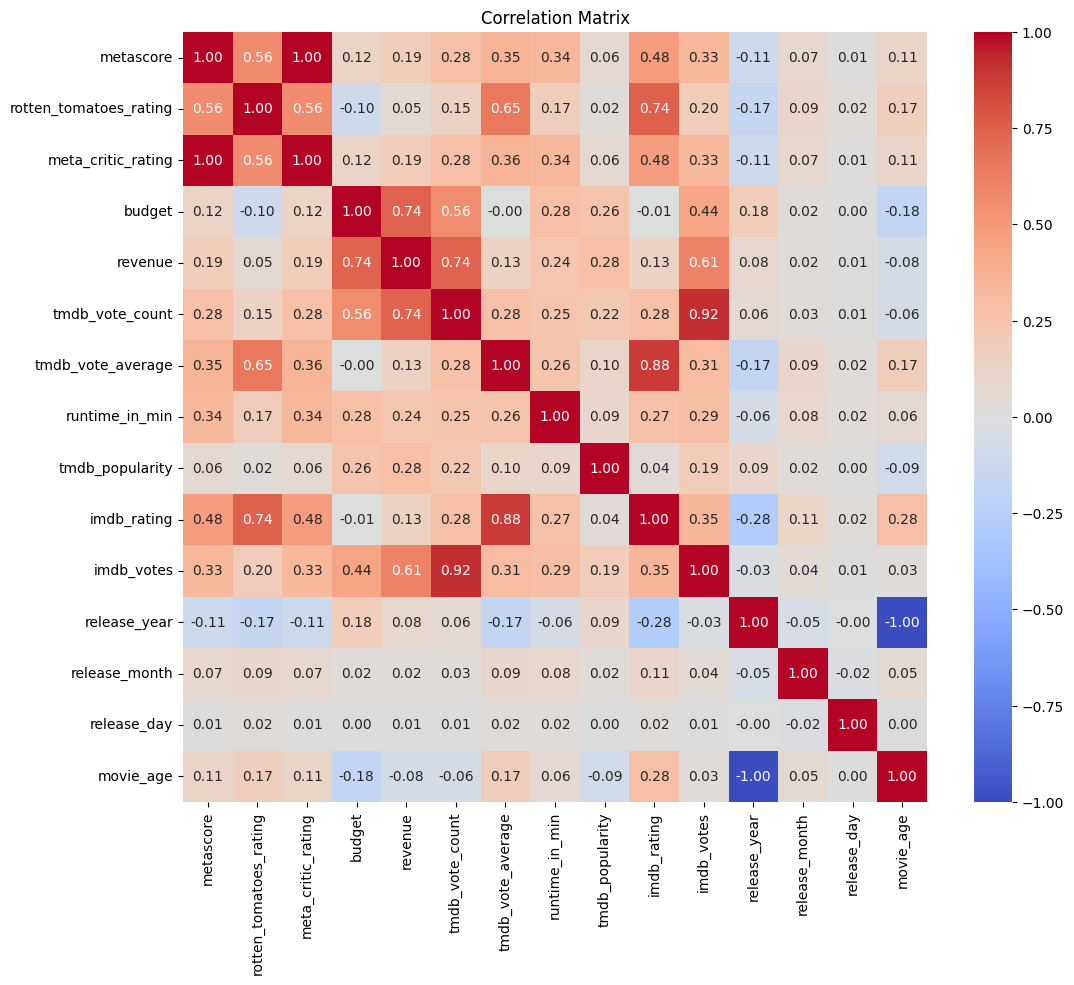

In [6]:
corr_matrix = data[numeric_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


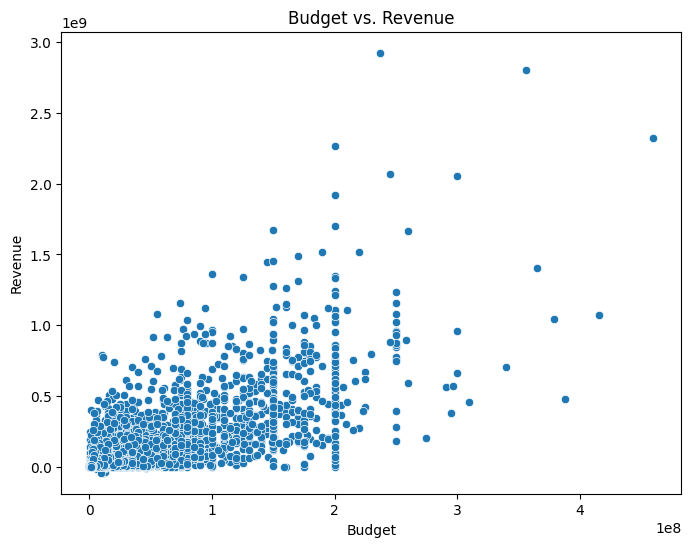

In [7]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['budget'], y=data['revenue'])
plt.title("Budget vs. Revenue")
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.show()


In [8]:
cat_cols = ['production_country_name', 'spoken_languages', 'age_rating']
for col in cat_cols:
    print(f"Value counts for {col}:")
    print(data[col].value_counts())
    print("-" * 50)


Value counts for production_country_name:
production_country_name
United States of America                          4920
Others                                            1142
Others,United States of America                    527
United Kingdom,United States of America            474
France                                             374
                                                  ... 
United States of America,Others,Canada               1
United Kingdom,Canada                                1
United Kingdom,Germany,France                        1
United Kingdom,United States of America,Canada       1
France,Others,Germany                                1
Name: count, Length: 172, dtype: int64
--------------------------------------------------
Value counts for spoken_languages:
spoken_languages
English                                 5650
Others                                   575
English,Others                           528
French                                   372
Others,

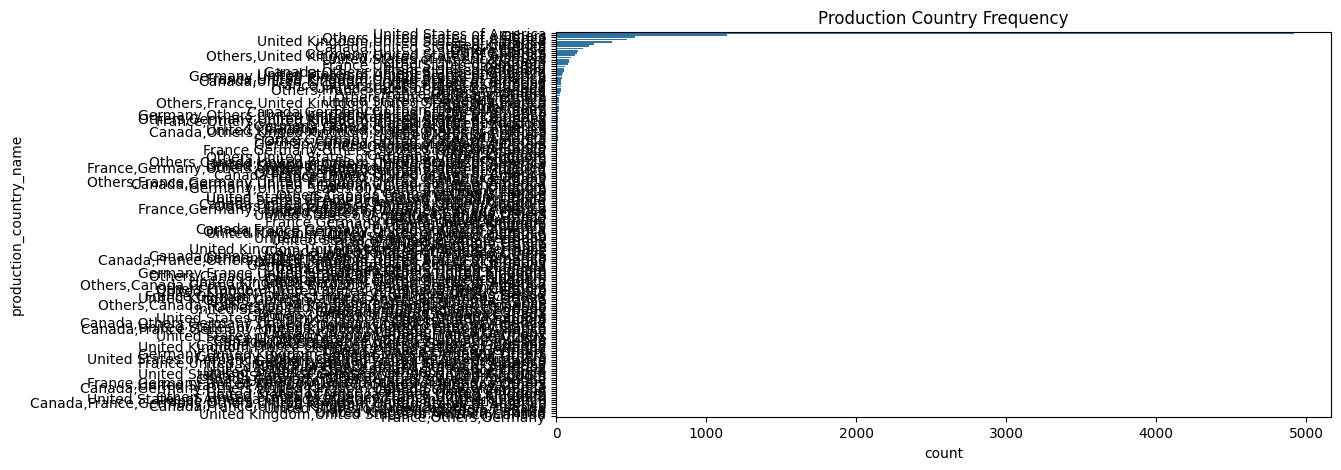

In [9]:
plt.figure(figsize=(10, 5))
sns.countplot(y=data['production_country_name'], order=data['production_country_name'].value_counts().index)
plt.title("Production Country Frequency")
plt.show()


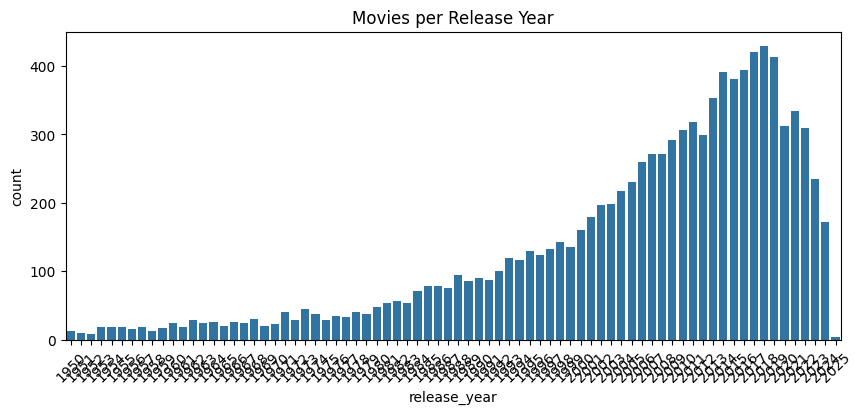

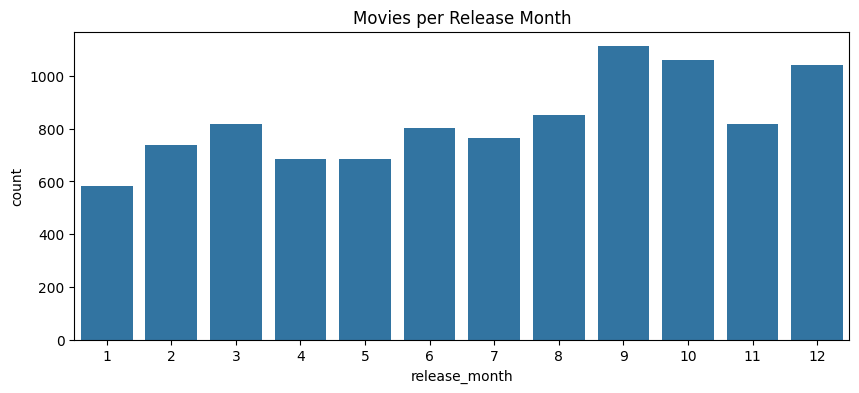

In [10]:
plt.figure(figsize=(10, 4))
sns.countplot(x=data['release_year'])
plt.title("Movies per Release Year")
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.show()

plt.figure(figsize=(10, 4))
sns.countplot(x=data['release_month'])
plt.title("Movies per Release Month")
plt.show()


In [11]:
print(data['is_weekend'].value_counts(normalize=True))
print(data['is_holiday_season'].value_counts(normalize=True))


is_weekend
0    0.532791
1    0.467209
Name: proportion, dtype: float64
is_holiday_season
0    0.656121
1    0.343879
Name: proportion, dtype: float64


In [12]:
# Explode the genre column for analysis
genres = data['genre_names'].dropna().str.split(r',\s*').explode()
print(genres.value_counts())


genre_names
Drama              4363
Comedy             3591
Thriller           2680
Action             2320
Adventure          1663
Romance            1632
Crime              1513
Horror             1458
Science Fiction    1229
Family             1121
Fantasy            1119
Mystery             916
Animation           893
History             476
War                 305
Music               287
Western             145
Documentary         139
TV Movie            119
Missing_data          1
Name: count, dtype: int64


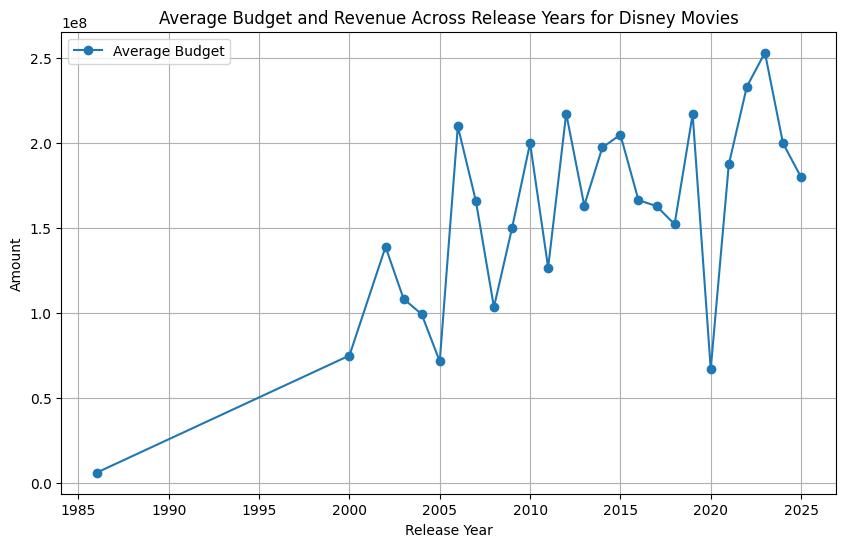

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter for Disney movies (assuming "Disney" appears in the production_company_name)
disney_data = data[data["production_company_name"].str.contains("Marvel", case=False, na=False)]

# Further filter for rows where budget_missing is 0
disney_data = disney_data[((disney_data["budget_missing"] == 0) & (disney_data["revenue_missing"] == 0))]

# Group by release_year and compute the average budget and revenue
budget_revenue_by_year = disney_data.groupby("release_year")[["budget", "revenue"]].mean().reset_index()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(budget_revenue_by_year["release_year"], budget_revenue_by_year["budget"], marker="o", linestyle="-", label="Average Budget")
# plt.plot(budget_revenue_by_year["release_year"], budget_revenue_by_year["revenue"], marker="o", linestyle="-", label="Average Revenue")
plt.xlabel("Release Year")
plt.ylabel("Amount")
plt.title("Average Budget and Revenue Across Release Years for Disney Movies")
plt.legend()
plt.grid(True)
plt.show()

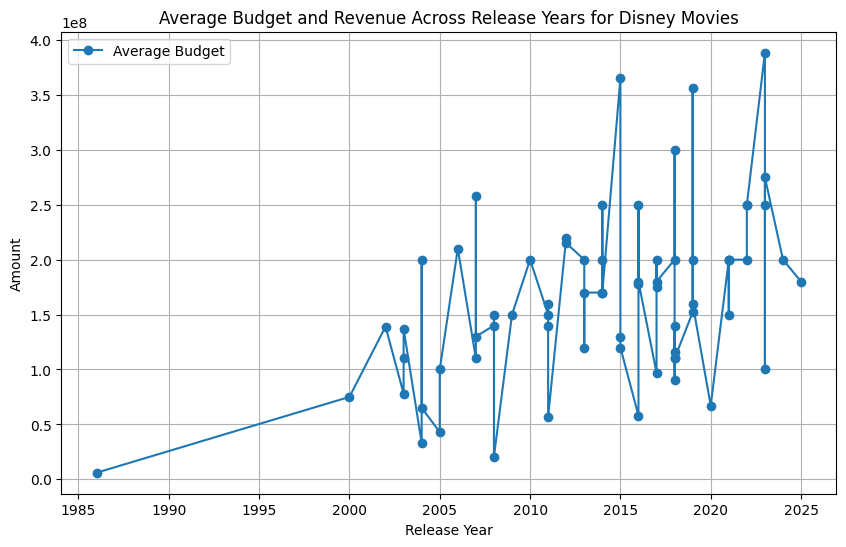

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter for Disney movies (assuming "Disney" appears in the production_company_name)
company_data = data[data["production_company_name"].str.contains("Marvel", case=False, na=False)]

# Further filter for rows where budget_missing is 0
company_data = company_data[((company_data["budget_missing"] == 0) & (company_data["revenue_missing"] == 0))]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(company_data["release_year"], company_data["budget"], marker="o", linestyle="-", label="Average Budget")
# plt.plot(company_data["release_year"], company_data["revenue"], marker="o", linestyle="-", label="Average Revenue")
plt.xlabel("Release Year")
plt.ylabel("Amount")
plt.title("Average Budget and Revenue Across Release Years for Disney Movies")
plt.legend()
plt.grid(True)
plt.show()